In [31]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [32]:
plt.style.use('fivethirtyeight')

In [33]:
df = pd.read_csv('BBNI.JK.csv')
df

Date    Open    High     Low   Close    Adj Close      Volume
0     2017-01-02  5525.0  5525.0  5525.0  5525.0  4465.352539         0.0
1     2017-01-03  5525.0  5525.0  5450.0  5475.0  4424.942871   6710500.0
2     2017-01-04  5500.0  5600.0  5475.0  5600.0  4525.968262  21406600.0
3     2017-01-05  5650.0  5650.0  5550.0  5625.0  4546.173828  10540900.0
4     2017-01-06  5600.0  5675.0  5575.0  5600.0  4525.968262  11663500.0
...          ...     ...     ...     ...     ...          ...         ...
1257  2021-12-24  6650.0  6725.0  6575.0  6725.0  6330.151855  13733200.0
1258  2021-12-27  6725.0  6750.0  6675.0  6750.0  6353.684082  10650300.0
1259  2021-12-28  6750.0  6775.0  6700.0  6700.0  6306.619629  14716300.0
1260  2021-12-29  6700.0  6750.0  6675.0  6725.0  6330.151855   8425900.0
1261  2021-12-30  6725.0  6775.0  6675.0  6750.0  6353.684082  11809700.0

[1262 rows x 7 columns]

In [34]:
df.dropna(inplace=True)

In [35]:
def split_data(df, train_size): 
  size = int(len(df) * train_size)
  train, test = df.iloc[0:size], df.iloc[size:len(df)]
  return train, test

train, test = split_data(df['Close'], 0.8) #80% Train

In [36]:
scaler = MinMaxScaler()
train = scaler.fit_transform(train.values.reshape(-1,1))
test = scaler.transform(test.values.reshape(-1,1))

In [37]:
def create_sequences(data, seq_length=60):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)
seq_length=60
X_train, y_train = create_sequences(train, seq_length)
X_test, y_test = create_sequences(test, seq_length)

In [38]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [39]:
model = Sequential([
    LSTM(128, input_shape=(seq_length, 1), return_sequences=True),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2), 
    Dense(32),
    Dense(16),
    Dense(1)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, 
              metrics=["mae"], 
              loss=tf.keras.losses.Huber())

early_stop = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)

In [40]:
history = model.fit(X_train, y_train, epochs=1000, batch_size=128, validation_data=(X_test, y_test), shuffle=False, callbacks=[early_stop])

Epoch 1/1000
8/8 [==============================] - 10s 614ms/step - loss: 0.0574 - mae: 0.2799 - val_loss: 0.0016 - val_mae: 0.0426
Epoch 2/1000
8/8 [==============================] - 2s 252ms/step - loss: 0.0133 - mae: 0.1338 - val_loss: 0.0024 - val_mae: 0.0600
Epoch 3/1000
8/8 [==============================] - 2s 258ms/step - loss: 0.0059 - mae: 0.0865 - val_loss: 0.0041 - val_mae: 0.0839
Epoch 4/1000
8/8 [==============================] - 2s 265ms/step - loss: 0.0042 - mae: 0.0724 - val_loss: 0.0017 - val_mae: 0.0483
Epoch 5/1000
8/8 [==============================] - 2s 285ms/step - loss: 0.0040 - mae: 0.0704 - val_loss: 0.0026 - val_mae: 0.0664
Epoch 6/1000
8/8 [==============================] - 2s 279ms/step - loss: 0.0033 - mae: 0.0624 - val_loss: 0.0011 - val_mae: 0.0346
Epoch 7/1000
8/8 [==============================] - 2s 268ms/step - loss: 0.0032 - mae: 0.0611 - val_loss: 0.0016 - val_mae: 0.0487
Epoch 8/1000
8/8 [==============================] - 2s 300ms/step - loss: 0

8/8 [==============================] - 2s 311ms/step - loss: 0.0015 - mae: 0.0423 - val_loss: 4.3335e-04 - val_mae: 0.0223
Epoch 62/1000
8/8 [==============================] - 2s 308ms/step - loss: 0.0013 - mae: 0.0373 - val_loss: 4.3465e-04 - val_mae: 0.0222
Epoch 63/1000
8/8 [==============================] - 3s 321ms/step - loss: 0.0012 - mae: 0.0373 - val_loss: 4.2733e-04 - val_mae: 0.0221
Epoch 64/1000
8/8 [==============================] - 2s 305ms/step - loss: 0.0011 - mae: 0.0363 - val_loss: 4.1892e-04 - val_mae: 0.0220
Epoch 65/1000
8/8 [==============================] - 2s 303ms/step - loss: 0.0011 - mae: 0.0354 - val_loss: 4.1398e-04 - val_mae: 0.0219
Epoch 66/1000
8/8 [==============================] - 2s 304ms/step - loss: 0.0012 - mae: 0.0383 - val_loss: 4.2038e-04 - val_mae: 0.0221
Epoch 67/1000
8/8 [==============================] - 2s 281ms/step - loss: 0.0012 - mae: 0.0380 - val_loss: 4.0694e-04 - val_mae: 0.0218
Epoch 68/1000
8/8 [==============================] - 2s

8/8 [==============================] - 2s 268ms/step - loss: 7.6883e-04 - mae: 0.0295 - val_loss: 2.9020e-04 - val_mae: 0.0187
Epoch 121/1000
8/8 [==============================] - 2s 268ms/step - loss: 7.5357e-04 - mae: 0.0296 - val_loss: 3.0063e-04 - val_mae: 0.0191
Epoch 122/1000
8/8 [==============================] - 2s 283ms/step - loss: 8.9687e-04 - mae: 0.0324 - val_loss: 2.8754e-04 - val_mae: 0.0192
Epoch 123/1000
8/8 [==============================] - 2s 301ms/step - loss: 7.6379e-04 - mae: 0.0293 - val_loss: 3.0940e-04 - val_mae: 0.0195
Epoch 124/1000
8/8 [==============================] - 2s 280ms/step - loss: 7.1771e-04 - mae: 0.0284 - val_loss: 2.8291e-04 - val_mae: 0.0186
Epoch 125/1000
8/8 [==============================] - 2s 277ms/step - loss: 7.2378e-04 - mae: 0.0285 - val_loss: 2.9237e-04 - val_mae: 0.0192
Epoch 126/1000
8/8 [==============================] - 2s 251ms/step - loss: 9.1504e-04 - mae: 0.0327 - val_loss: 2.9527e-04 - val_mae: 0.0196
Epoch 127/1000
8/8 [=

8/8 [==============================] - 2s 275ms/step - loss: 5.5585e-04 - mae: 0.0255 - val_loss: 2.2482e-04 - val_mae: 0.0164
Epoch 179/1000
8/8 [==============================] - 3s 363ms/step - loss: 5.4459e-04 - mae: 0.0251 - val_loss: 2.3770e-04 - val_mae: 0.0171
Epoch 180/1000
8/8 [==============================] - 3s 315ms/step - loss: 7.6864e-04 - mae: 0.0298 - val_loss: 2.9572e-04 - val_mae: 0.0203
Epoch 181/1000
8/8 [==============================] - 2s 287ms/step - loss: 5.6054e-04 - mae: 0.0260 - val_loss: 2.3589e-04 - val_mae: 0.0169
Epoch 182/1000
8/8 [==============================] - 2s 277ms/step - loss: 5.8159e-04 - mae: 0.0258 - val_loss: 2.3938e-04 - val_mae: 0.0173
Epoch 183/1000
8/8 [==============================] - 2s 316ms/step - loss: 8.7539e-04 - mae: 0.0319 - val_loss: 3.1617e-04 - val_mae: 0.0211
Epoch 184/1000
8/8 [==============================] - 2s 271ms/step - loss: 6.3851e-04 - mae: 0.0269 - val_loss: 2.4618e-04 - val_mae: 0.0174
Epoch 185/1000
8/8 [=

8/8 [==============================] - 2s 270ms/step - loss: 5.2696e-04 - mae: 0.0245 - val_loss: 2.1893e-04 - val_mae: 0.0166
Epoch 237/1000
8/8 [==============================] - 2s 307ms/step - loss: 8.1928e-04 - mae: 0.0317 - val_loss: 3.9585e-04 - val_mae: 0.0243
Epoch 238/1000
8/8 [==============================] - 2s 310ms/step - loss: 6.2386e-04 - mae: 0.0275 - val_loss: 2.4141e-04 - val_mae: 0.0170
Epoch 239/1000
8/8 [==============================] - 2s 276ms/step - loss: 5.7776e-04 - mae: 0.0256 - val_loss: 2.2472e-04 - val_mae: 0.0169
Epoch 240/1000
8/8 [==============================] - 2s 314ms/step - loss: 8.4824e-04 - mae: 0.0319 - val_loss: 4.2430e-04 - val_mae: 0.0251
Epoch 241/1000
8/8 [==============================] - 2s 285ms/step - loss: 8.3455e-04 - mae: 0.0326 - val_loss: 2.6062e-04 - val_mae: 0.0177
Epoch 242/1000
8/8 [==============================] - 2s 295ms/step - loss: 6.7030e-04 - mae: 0.0281 - val_loss: 2.6374e-04 - val_mae: 0.0187
Epoch 243/1000
8/8 [=

8/8 [==============================] - 2s 258ms/step - loss: 0.0011 - mae: 0.0385 - val_loss: 5.8926e-04 - val_mae: 0.0293
Epoch 295/1000
8/8 [==============================] - 2s 284ms/step - loss: 0.0015 - mae: 0.0440 - val_loss: 9.2806e-04 - val_mae: 0.0389
Epoch 296/1000
8/8 [==============================] - 2s 300ms/step - loss: 6.9795e-04 - mae: 0.0297 - val_loss: 2.1118e-04 - val_mae: 0.0162
Epoch 297/1000
8/8 [==============================] - 2s 270ms/step - loss: 7.0846e-04 - mae: 0.0297 - val_loss: 3.9078e-04 - val_mae: 0.0223
Epoch 298/1000
8/8 [==============================] - 2s 256ms/step - loss: 0.0011 - mae: 0.0376 - val_loss: 7.1137e-04 - val_mae: 0.0340
Epoch 299/1000
8/8 [==============================] - 2s 254ms/step - loss: 6.0274e-04 - mae: 0.0280 - val_loss: 2.5089e-04 - val_mae: 0.0173
Epoch 300/1000
8/8 [==============================] - 2s 245ms/step - loss: 5.6248e-04 - mae: 0.0251 - val_loss: 1.9383e-04 - val_mae: 0.0153
Epoch 301/1000
8/8 [=============

Epoch 352/1000
8/8 [==============================] - 2s 310ms/step - loss: 5.3374e-04 - mae: 0.0245 - val_loss: 2.2559e-04 - val_mae: 0.0160
Epoch 353/1000
8/8 [==============================] - 2s 286ms/step - loss: 7.2912e-04 - mae: 0.0298 - val_loss: 4.2330e-04 - val_mae: 0.0255
Epoch 354/1000
8/8 [==============================] - 2s 296ms/step - loss: 5.6051e-04 - mae: 0.0264 - val_loss: 2.6444e-04 - val_mae: 0.0181
Epoch 355/1000
8/8 [==============================] - 3s 446ms/step - loss: 4.4711e-04 - mae: 0.0229 - val_loss: 1.5994e-04 - val_mae: 0.0145
Epoch 356/1000
8/8 [==============================] - 3s 324ms/step - loss: 4.7850e-04 - mae: 0.0237 - val_loss: 2.0069e-04 - val_mae: 0.0166
Epoch 357/1000
8/8 [==============================] - 2s 317ms/step - loss: 4.5912e-04 - mae: 0.0230 - val_loss: 2.3992e-04 - val_mae: 0.0170
Epoch 358/1000
8/8 [==============================] - 3s 325ms/step - loss: 4.6840e-04 - mae: 0.0236 - val_loss: 2.0626e-04 - val_mae: 0.0170
Epoch 

Epoch 410/1000
8/8 [==============================] - 2s 312ms/step - loss: 7.1527e-04 - mae: 0.0300 - val_loss: 4.2644e-04 - val_mae: 0.0257
Epoch 411/1000
8/8 [==============================] - 3s 328ms/step - loss: 4.4521e-04 - mae: 0.0235 - val_loss: 1.6328e-04 - val_mae: 0.0136
Epoch 412/1000
8/8 [==============================] - 2s 321ms/step - loss: 4.2275e-04 - mae: 0.0217 - val_loss: 1.4610e-04 - val_mae: 0.0134
Epoch 413/1000
8/8 [==============================] - 2s 253ms/step - loss: 4.7535e-04 - mae: 0.0229 - val_loss: 1.9693e-04 - val_mae: 0.0166
Epoch 414/1000
8/8 [==============================] - 2s 263ms/step - loss: 4.1059e-04 - mae: 0.0219 - val_loss: 1.5320e-04 - val_mae: 0.0133
Epoch 415/1000
8/8 [==============================] - 2s 262ms/step - loss: 4.2526e-04 - mae: 0.0220 - val_loss: 1.7128e-04 - val_mae: 0.0153
Epoch 416/1000
8/8 [==============================] - 2s 260ms/step - loss: 4.0223e-04 - mae: 0.0213 - val_loss: 1.4635e-04 - val_mae: 0.0138
Epoch 

Epoch 468/1000
8/8 [==============================] - 2s 284ms/step - loss: 4.8729e-04 - mae: 0.0237 - val_loss: 1.6324e-04 - val_mae: 0.0139
Epoch 469/1000
8/8 [==============================] - 2s 290ms/step - loss: 6.6117e-04 - mae: 0.0277 - val_loss: 3.3698e-04 - val_mae: 0.0225
Epoch 470/1000
8/8 [==============================] - 2s 251ms/step - loss: 5.0883e-04 - mae: 0.0246 - val_loss: 2.1026e-04 - val_mae: 0.0158
Epoch 471/1000
8/8 [==============================] - 2s 247ms/step - loss: 4.7959e-04 - mae: 0.0237 - val_loss: 1.7148e-04 - val_mae: 0.0152
Epoch 472/1000
8/8 [==============================] - 2s 249ms/step - loss: 4.9413e-04 - mae: 0.0237 - val_loss: 1.7209e-04 - val_mae: 0.0151
Epoch 473/1000
8/8 [==============================] - 2s 246ms/step - loss: 5.0428e-04 - mae: 0.0243 - val_loss: 1.8799e-04 - val_mae: 0.0146
Epoch 474/1000
8/8 [==============================] - 2s 273ms/step - loss: 5.7697e-04 - mae: 0.0263 - val_loss: 3.2654e-04 - val_mae: 0.0222
Epoch 

Epoch 526/1000
8/8 [==============================] - 2s 281ms/step - loss: 5.1326e-04 - mae: 0.0236 - val_loss: 1.6638e-04 - val_mae: 0.0144
Epoch 527/1000
8/8 [==============================] - 2s 283ms/step - loss: 7.0629e-04 - mae: 0.0292 - val_loss: 3.5466e-04 - val_mae: 0.0229
Epoch 528/1000
8/8 [==============================] - 2s 257ms/step - loss: 7.1794e-04 - mae: 0.0304 - val_loss: 2.9390e-04 - val_mae: 0.0196
Epoch 529/1000
8/8 [==============================] - 2s 252ms/step - loss: 7.5229e-04 - mae: 0.0303 - val_loss: 3.9735e-04 - val_mae: 0.0245
Epoch 530/1000
8/8 [==============================] - 2s 251ms/step - loss: 4.9849e-04 - mae: 0.0240 - val_loss: 1.7041e-04 - val_mae: 0.0144
Epoch 531/1000
8/8 [==============================] - 2s 253ms/step - loss: 5.1548e-04 - mae: 0.0247 - val_loss: 1.9200e-04 - val_mae: 0.0149
Epoch 532/1000
8/8 [==============================] - 2s 272ms/step - loss: 6.8138e-04 - mae: 0.0290 - val_loss: 3.7459e-04 - val_mae: 0.0238
Epoch 

Epoch 584/1000
8/8 [==============================] - 2s 257ms/step - loss: 5.4337e-04 - mae: 0.0260 - val_loss: 1.9377e-04 - val_mae: 0.0153
Epoch 585/1000
8/8 [==============================] - 2s 264ms/step - loss: 4.2649e-04 - mae: 0.0222 - val_loss: 1.4532e-04 - val_mae: 0.0138
Epoch 586/1000
8/8 [==============================] - 2s 274ms/step - loss: 4.6147e-04 - mae: 0.0231 - val_loss: 2.0104e-04 - val_mae: 0.0166
Epoch 587/1000
8/8 [==============================] - 2s 283ms/step - loss: 4.8760e-04 - mae: 0.0236 - val_loss: 2.0886e-04 - val_mae: 0.0159
Epoch 588/1000
8/8 [==============================] - 2s 279ms/step - loss: 5.0736e-04 - mae: 0.0243 - val_loss: 2.2055e-04 - val_mae: 0.0177
Epoch 589/1000
8/8 [==============================] - 2s 258ms/step - loss: 3.7757e-04 - mae: 0.0212 - val_loss: 1.3672e-04 - val_mae: 0.0130


In [41]:
y_pred = model.predict(X_test)
y_pred = list(np.reshape(y_pred, (1,len(y_pred)))[0])

7/7 [==============================] - 1s 35ms/step


In [42]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

def percentage_accuracy(y_true, y_pred, tolerance=0.1):
    return np.mean(np.abs((y_true - y_pred) / y_true) < tolerance)

accuracy = percentage_accuracy(y_test, y_pred, tolerance=0.1)
print(f"Percentage Accuracy within 10%: {accuracy * 100}%")


Mean Absolute Error: 0.01313478981854818
Percentage Accuracy within 10%: 96.37305699481865%


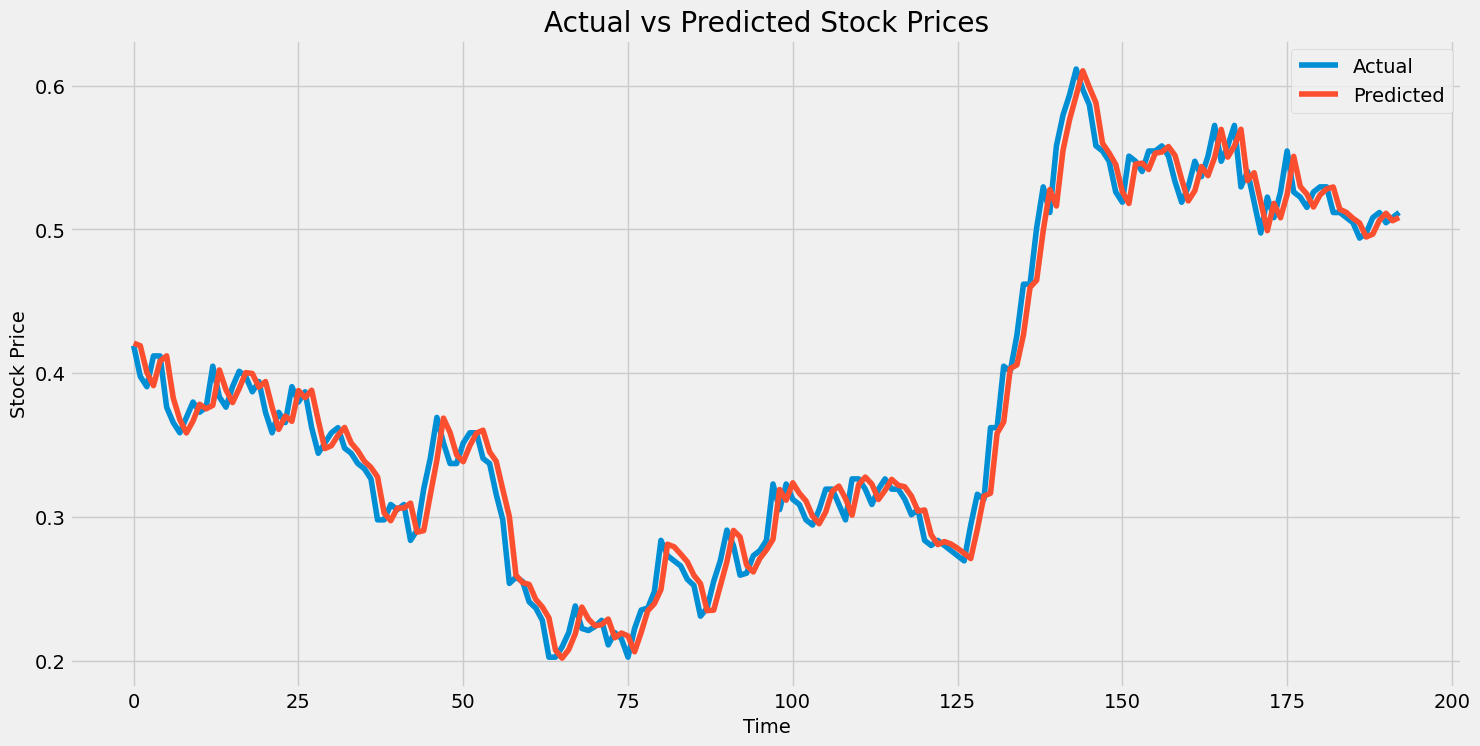

In [43]:
plt.figure(figsize=(16, 8))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()

In [44]:
# save model
model.save('BBNI.h5')

In [45]:
# load model
loaded_model = load_model('BBNI.h5')